# Keras API Project Exercise

The data used is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

The provided file is a special version of this data that has some extra feature engineering for you to do.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Info data

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading data and imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis


**Countplot of loan_status, categories are not balanced**

<AxesSubplot: xlabel='loan_status', ylabel='count'>

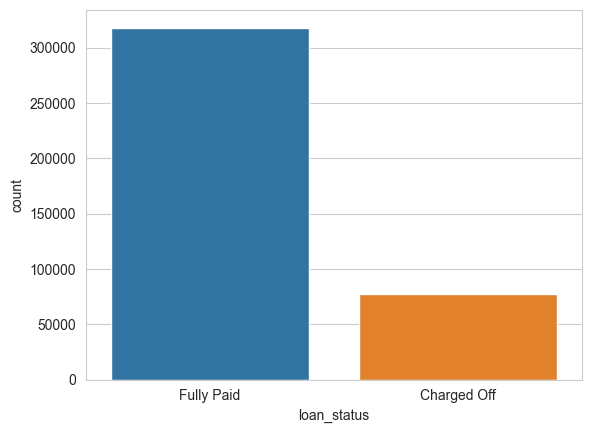

In [9]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='loan_status')

**Histogram of the loan_amnt column**

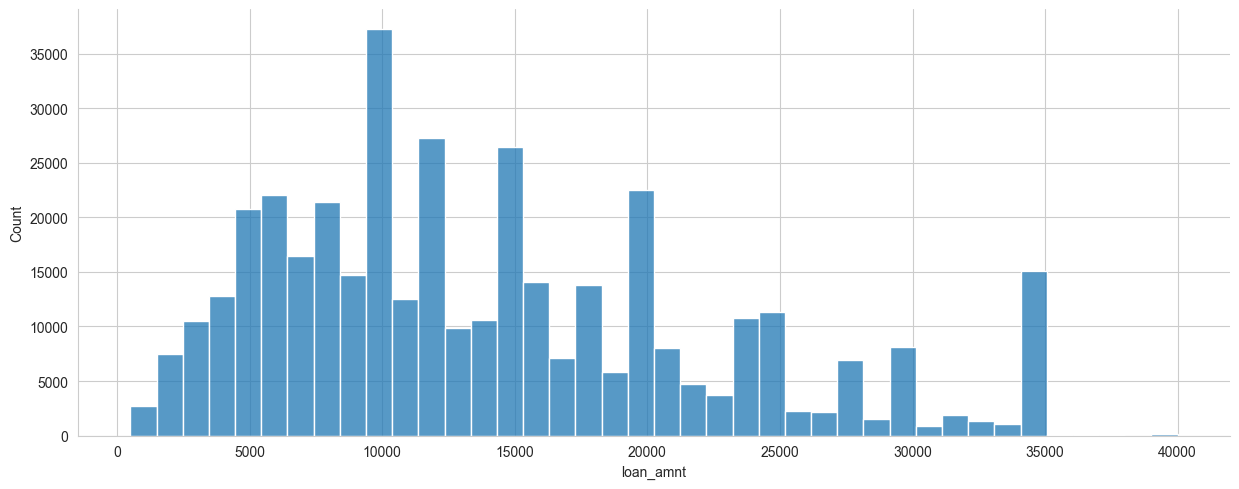

In [10]:
sns.displot(data=df, x='loan_amnt', aspect=2.5, bins=40)

**Correlation between all continuous numeric variables**

In [11]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Heatmap: visualised correlation**

<AxesSubplot: >

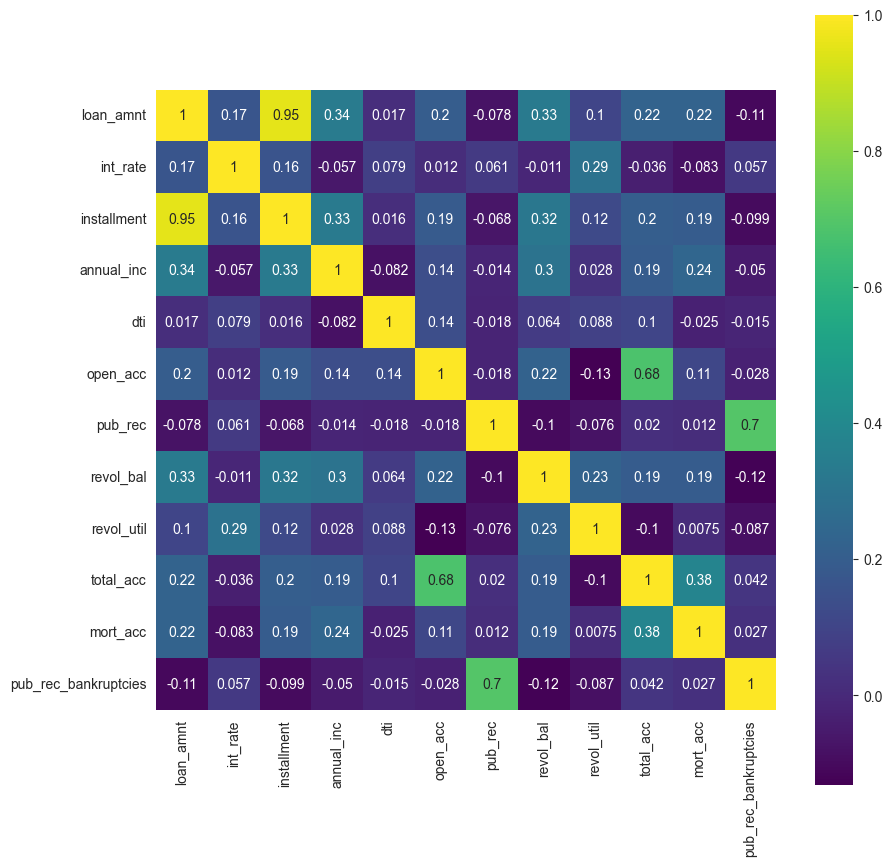

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True, square=True)


**0.95 correlation of "loan_amnt" with the "installment" feature**

In [13]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


**Scatterplot of "loan_amnt" vs "installment"**

<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

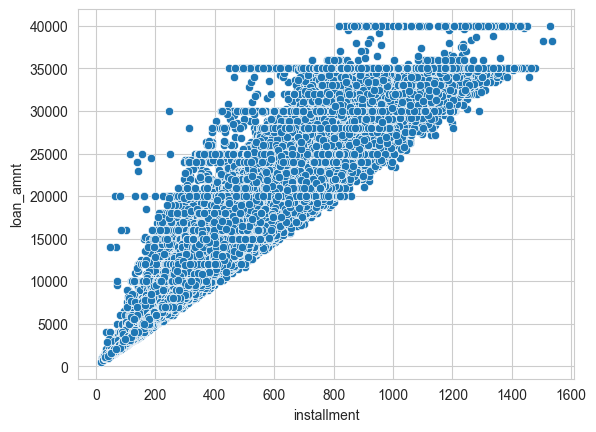

In [15]:
sns.scatterplot(data=df, x='installment', y='loan_amnt')

**Boxplot showing the relationship between loan_status and loan_amnt**

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

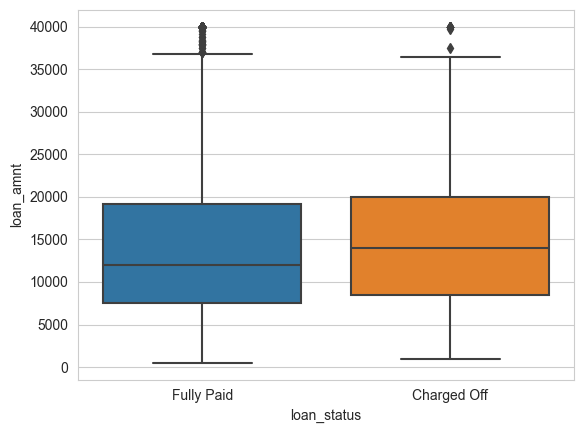

In [16]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

**Summary statistics for loan amount, grouped by loan_status**

In [17]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [18]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [19]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**Countplot per grade. Hue set to loan_status**

<AxesSubplot: xlabel='grade', ylabel='count'>

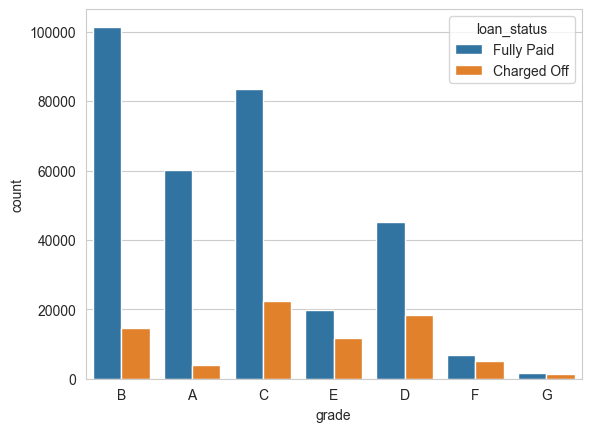

In [20]:
sns.countplot(data=df, x='grade', hue='loan_status')

**Countplot per subgrade**

In [21]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

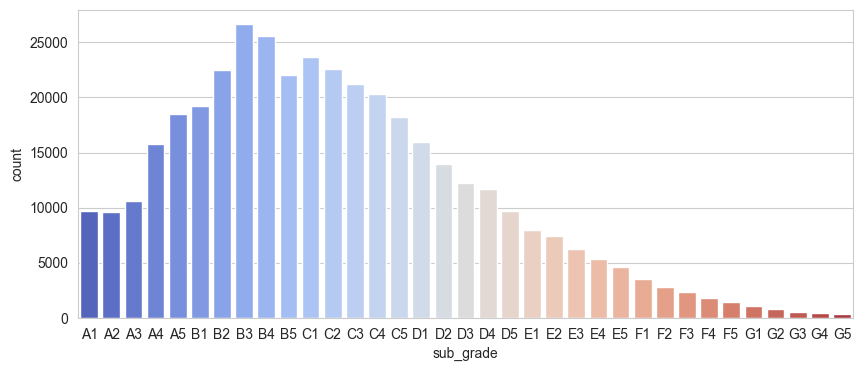

In [22]:
plt.subplots(figsize=(10,4))
sns.countplot(data=df, x='sub_grade', 
              palette='coolwarm',
              order=df['sub_grade'].sort_values().unique())

**Countplot per subgrade; hue='loan_status'**

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

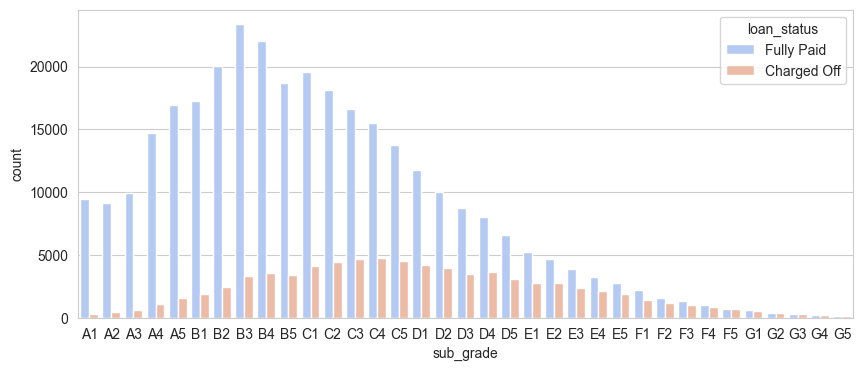

In [23]:
plt.subplots(figsize=(10,4))
sns.countplot(data=df, x='sub_grade', hue='loan_status',
              palette='coolwarm',
              order=df['sub_grade'].sort_values().unique())

**Zooming in on F and G subgrades**

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

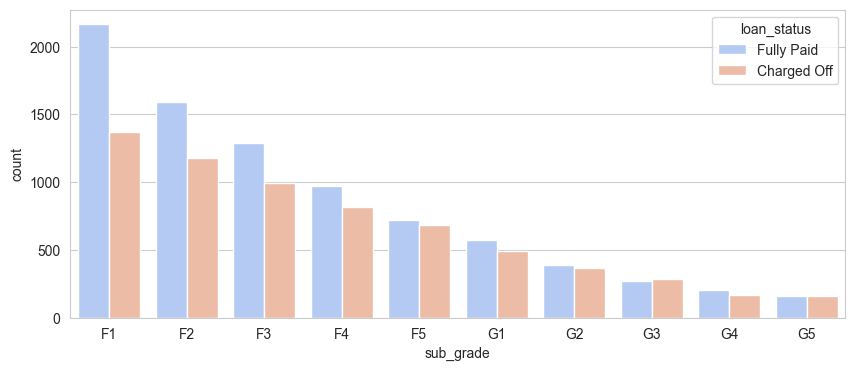

In [24]:
plt.subplots(figsize=(10,4))
sns.countplot(data=df[(df['grade']=='F') | (df['grade']=='G')], 
              x='sub_grade', hue='loan_status',
              palette='coolwarm',
              order=df[(df['grade']=='F') | (df['grade']=='G')]['sub_grade'].sort_values().unique())

**Creating a new column called 'default' which will contain a 1 if the loan status was "Charged Off" and a 0 if it was "Fully Paid"**

In [25]:
df['default'] = df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

In [26]:
df[['loan_status', 'default']]

,loan_status,default
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
3,Fully Paid,0
4,Charged Off,1
...,...,...
396025,Fully Paid,0
396026,Fully Paid,0
396027,Fully Paid,0
396028,Fully Paid,0


**Bar plot showing the correlation of the numeric features to the new default column**

<AxesSubplot: >

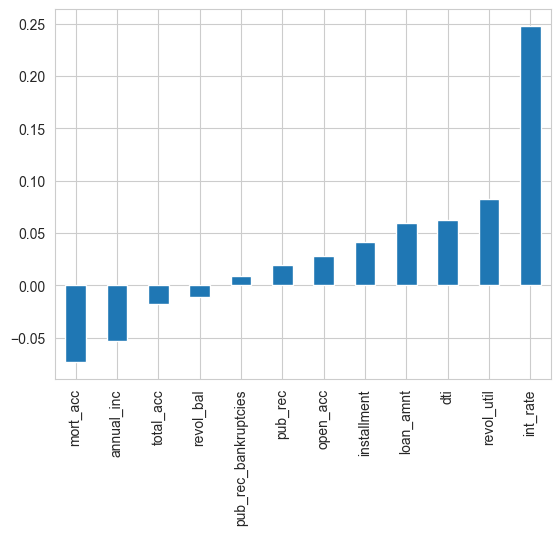

In [27]:
df.corr(numeric_only=True)['default'][:-1].sort_values().plot(kind='bar')

---
---
# Section 2: Data Preprocessing


# Missing Data


In [28]:
df.shape[0]

396030

**Total count of missing values per column**

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
default                     0
dtype: int64

**Total percentage of missing values per column**

In [30]:
(df.isnull().sum()/df.shape[0]) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
default                 0.000000
dtype: float64

**Examining emp_title and emp_length**

In [31]:
print(feat_info('emp_title'))
print('\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**How many unique employment job titles are there?**

In [32]:
df['emp_title'].nunique()

173105

In [33]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Too many unique job titles. Removing emp_title column.**

In [34]:
df.drop('emp_title', axis=1, inplace=True)

**Count plot of emp_length**

In [35]:
df['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

In [36]:
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']

<AxesSubplot: xlabel='emp_length', ylabel='count'>

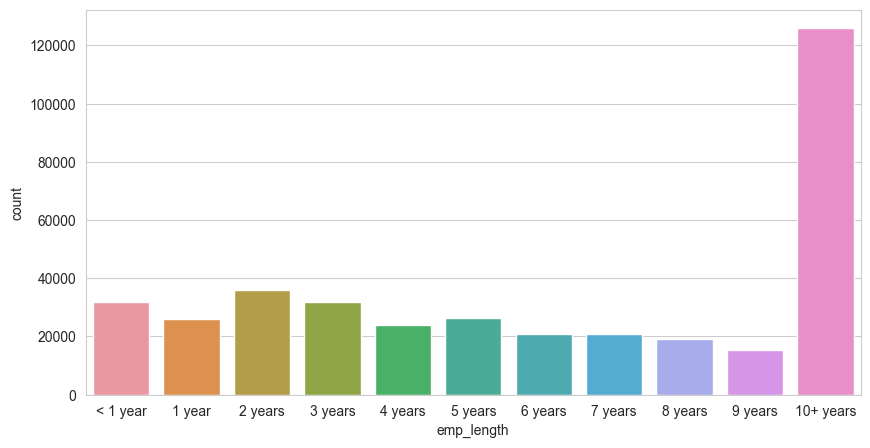

In [37]:
plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=order)

**The countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot: xlabel='emp_length', ylabel='count'>

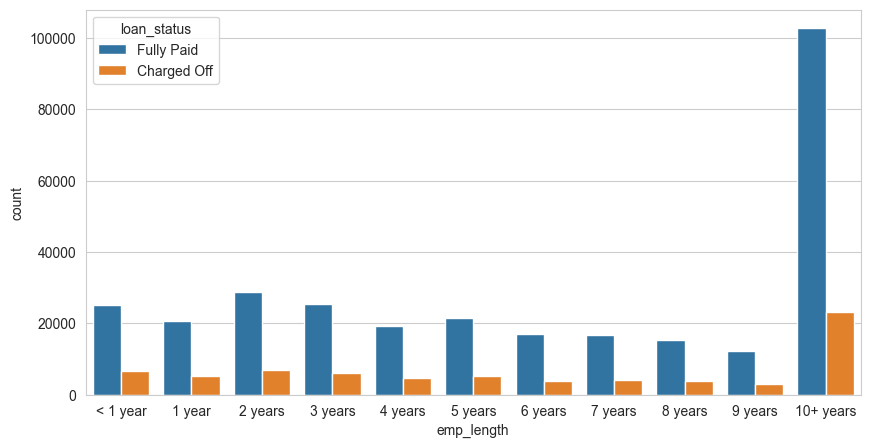

In [38]:
plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=order, hue='loan_status')

**This still doesn't precisely inform us if there is a relationship between employment length and being charged off**

**Counting the percentage of charge offs per category**

In [39]:
series = df.groupby('emp_length')['default'].sum()/df.groupby('emp_length')['default'].count()
series

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: default, dtype: float64

<AxesSubplot: xlabel='emp_length'>

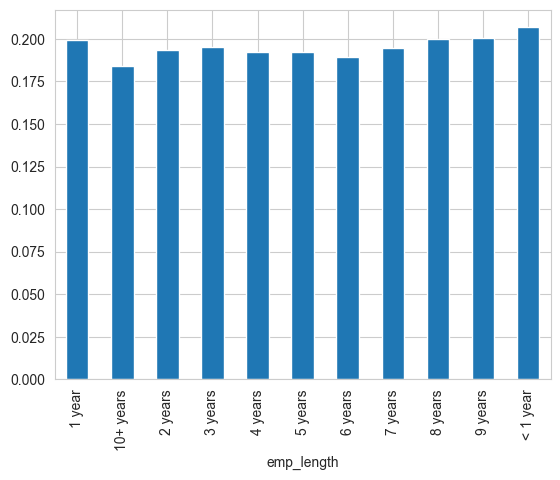

In [40]:
series.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Dropping the column.**

In [41]:
df.drop('emp_length', axis=1, inplace=True)

**Which feature columns still have missing data**

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
default                     0
dtype: int64

**Reviewing the title column vs the purpose column**

In [43]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [44]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [45]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is a subcategory/description of the purpose column. Dropping the column.**

In [46]:
df.drop('title', axis=1, inplace=True)

---
**Reviewing the mort_acc feature**

In [47]:
feat_info('mort_acc')

Number of mortgage accounts.


**Vvalue_counts of the mort_acc column**

In [48]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**Reviewing which column correlates to mort_acc the most**

In [49]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
default                -0.073111
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Grouping the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry**

In [50]:
grouped = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
grouped
# grouped.loc[6.0]

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Filling in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series created above.**

In [51]:
# df['mort_acc'].nunique()

In [52]:
df['mort_acc'].fillna(df['total_acc'].apply(lambda x: grouped.loc[x]), inplace=True)

In [53]:
# df['mort_acc'].nunique()

In [54]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
default                   0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Removing the rows that are missing values in those columns**

In [55]:
df.dropna(inplace=True)

In [56]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
default                 0
dtype: int64

## Categorical Variables and Dummy Variables


In [57]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type**

In [58]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [59]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [60]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**Grade is part of sub_grade, dropping grade**

In [61]:
df.drop('grade', axis=1, inplace=True)

**Converting subgrades into dummy variables**

In [62]:
df = pd.get_dummies(df, columns=['sub_grade'], drop_first=True)

In [63]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Converting ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables**

In [64]:
cols = ['verification_status', 'application_type','initial_list_status','purpose']
df = pd.get_dummies(df, columns=cols, drop_first=True)

### home_ownership
**Reviewing the value_counts for the home_ownership column**

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting to dummy variables, but replacing NONE and ANY with OTHER, so that we end up with just 4 categories**

In [66]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if (x=='NONE' or x=='ANY') else x)

In [67]:
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

### address
**Creating a column 'zip_code' that extracts the zip code from the address column**

In [68]:
df['zip_code'] = df['address'].apply(lambda x: x.split()[-1])

In [69]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**Converting zip_code column into dummy variables**

In [70]:
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)

In [71]:
df.drop('address', axis=1, inplace=True)

### issue_d 

**We wouldn't know beforehand whether or not a loan would be issued when using our model, so we wouldn't have an issue_date**

**dropping this feature**

In [72]:
df.drop('issue_d', axis=1, inplace=True)

### earliest_cr_line
**Extracting the year from this feature into 'earliest_cr_year'. Dropping 'earliest_cr_line'**

In [73]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: pd.to_datetime(x).year)
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [74]:
df.drop('earliest_cr_line', axis=1, inplace=True)

## Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

**Dropping loan_status. We'll use the default column since it's already in 0s and 1s**

In [76]:
df.drop('loan_status', axis=1, inplace=True)

**Setting X and y variables to the .values of the features and label and splitting the data**

In [77]:
X = df.drop('default', axis=1).values

In [78]:
y = df['default'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data


In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

# Creating the Model

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Building a sequential model**

In [85]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss='binary_crossentropy', optimizer='adam')

**Introducing early stopping**

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

**Introducing weights to minimize false negatives with the unbalanced sample**

In [88]:
from sklearn.utils import class_weight

In [89]:
weights = class_weight.compute_class_weight(class_weight='balanced',
                                            classes=np.unique(y_train),
                                            y=y_train)
weights

array([0.62163305, 2.55536248])

In [90]:
dict(enumerate(map(str, weights)))

{0: '0.6216330462820967', 1: '2.5553624828255073'}

**Fitting the model to the training data, adding validation data for later plotting**

In [91]:
model.fit(x=X_train, y=y_train, 
          epochs=100, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop], 
          class_weight={0:weights[0], 1:weights[1]})

Epoch 1/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3812 - val_loss: 0.3812
Epoch 2/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3645 - val_loss: 0.3758
Epoch 3/100
9881/9881 [==============================] - 21s 2ms/step - loss: 0.3633 - val_loss: 0.3632
Epoch 4/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3629 - val_loss: 0.3832
Epoch 5/100
9881/9881 [==============================] - 21s 2ms/step - loss: 0.3619 - val_loss: 0.3638
Epoch 6/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3616 - val_loss: 0.3613
Epoch 7/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3614 - val_loss: 0.3582
Epoch 8/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3608 - val_loss: 0.3444
Epoch 9/100
9881/9881 [==============================] - 22s 2ms/step - loss: 0.3604 - val_loss: 0.3336
Epoch 10/100
9881/9881 [==============================] - 22s 2m

# Section 3: Evaluating Model Performance.

**Plotting the validation loss versus the training loss**

In [92]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

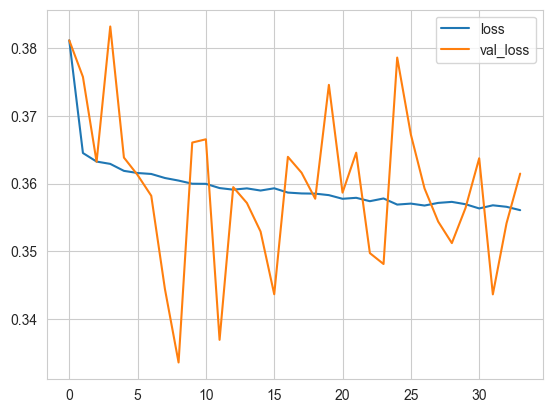

In [93]:
losses.plot()

**Creating predictions from the X_test set and displaying the classification report and confusion matrix for the X_test set**

In [94]:
preds = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[50312 13074]
 [ 3063 12595]]


              precision    recall  f1-score   support

           0       0.94      0.79      0.86     63386
           1       0.49      0.80      0.61     15658

    accuracy                           0.80     79044
   macro avg       0.72      0.80      0.74     79044
weighted avg       0.85      0.80      0.81     79044

